# Modelagem e simulação

Roberto M. Cesar Jr. - IME - USP

rmcesar@usp.br

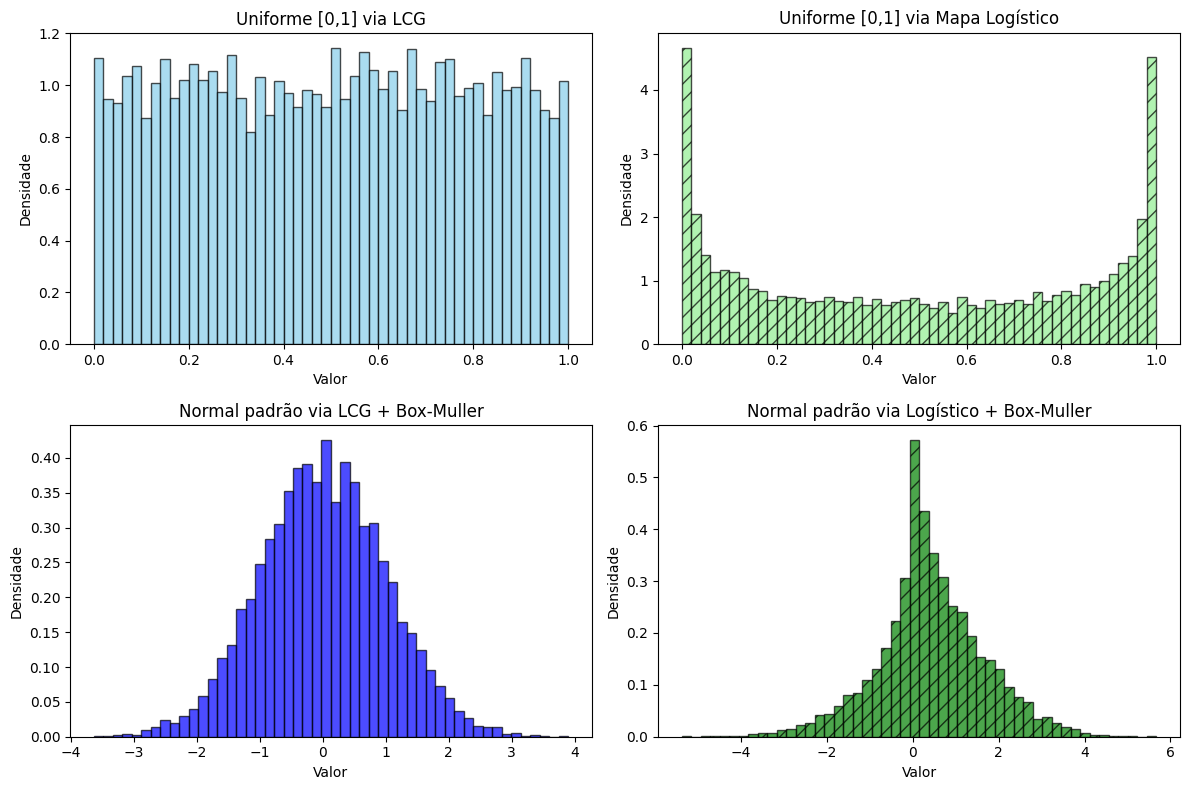

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def lcg(seed, a, c, m, N):
    x = seed
    sequence = []
    for _ in range(N):
        x = (a * x + c) % m
        sequence.append(x / m)
    return sequence

def logistic_map(x0, r, N):
    x = x0
    seq = []
    for _ in range(N):
        x = r * x * (1 - x)
        seq.append(x)
    return seq

def box_muller(u, v):
    return [np.sqrt(-2*np.log(u[i])) * np.cos(2*np.pi*v[i]) for i in range(len(u))]

def main():

  # Parâmetros
  N = 10000

  # --- Geração: LCG ---
  u_lcg = lcg(seed=12345, a=1664525, c=1013904223, m=2**32, N=N)
  v_lcg = lcg(seed=67890, a=1664525, c=1013904223, m=2**32, N=N)
  z_lcg = box_muller(u_lcg, v_lcg)

  # --- Geração: Mapa logístico ---
  u_log = logistic_map(0.123456, 4.0, N)
  v_log = logistic_map(0.654321, 4.0, N)
  z_log = box_muller(u_log, v_log)

  # --- Plot dos histogramas ---
  fig, axes = plt.subplots(2, 2, figsize=(12, 8))

  # Uniforme gerado por LCG
  axes[0, 0].hist(u_lcg, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
  axes[0, 0].set_title("Uniforme [0,1] via LCG")
  axes[0, 0].set_xlabel("Valor")
  axes[0, 0].set_ylabel("Densidade")

  # Uniforme gerado por mapa logístico
  axes[0, 1].hist(u_log, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black', hatch='//')
  axes[0, 1].set_title("Uniforme [0,1] via Mapa Logístico")
  axes[0, 1].set_xlabel("Valor")
  axes[0, 1].set_ylabel("Densidade")

  # Normal via LCG + Box-Muller
  axes[1, 0].hist(z_lcg, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
  axes[1, 0].set_title("Normal padrão via LCG + Box-Muller")
  axes[1, 0].set_xlabel("Valor")
  axes[1, 0].set_ylabel("Densidade")

  # Normal via mapa logístico + Box-Muller
  axes[1, 1].hist(z_log, bins=50, density=True, alpha=0.7, color='green', edgecolor='black', hatch='//')
  axes[1, 1].set_title("Normal padrão via Logístico + Box-Muller")
  axes[1, 1].set_xlabel("Valor")
  axes[1, 1].set_ylabel("Densidade")

  plt.tight_layout()
  plt.show()

main()
